---
# Simple Visualisation and Data Analysis in Python
---
In this notebook, we will illustrate some Python libraries that could be used in visualisation and data analysis task. 

We will be using time series data provided by [GapMinder](https://www.gapminder.org/data/).
We aim to: 
 1. Rapidly gain some understanding of an unfamiliar dataset. 
 2. Make some useful visualisation. 
 3. Formulate some question for which we can possibly extract answers from the dataset. 

# Python Data Analysis Libraries
---
We will be using [Pandas](https://pandas.pydata.org/) library for parsing and manipulating our dataset. 

If you haven't already, install the following Python packages. On Linux systems at least, you can run: 

In [25]:
# Third party libraries
# Observe that, in addition to bringing the libraries into our current namespace, 
#  we also give them a shorter alias. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy
from scipy.cluster.hierarchy import dendrogram, linkage


# Built-in libraries
import csv
import networkx as nx
import os

# This tells the notebook to display every graphs / images without calling plt.show()
%matplotlib inline


---
# Parsing data with Pandas
---
Now, we can go ahead and download some data from https://www.gapminder.org/data/. Since the file extension is `.csv`, we will naively parse it with Pandas csv parser, see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

Note that, unless you have prior knowledge of the dataset, the parameter values for the csv parser is determined by trial and error. 

In [91]:
with open("gdp_total_yearly_growth.csv") as infile:
    with open("gdp_total_yearly_growth_cleaned.csv", 'w') as outfile:
        content = infile.read()
        content = content.replace(chr(8722), "-")
        outfile.write(content)

In [105]:
# The path to the directory where we store our data. I am using the current directory.
data_dir = os.path.curdir  

# Safely construct the absolute path to the file without having to worry about how your OS represent file paths. 
gdp_file_path = os.path.join(data_dir, "gdp_total_yearly_growth_cleaned.csv") 
life_expectency_file_path = os.path.join(data_dir, "life_expectancy_years.csv")

# Reading the files into a Pandas dataframe. 

df_gdp = pd.read_csv(
    gdp_file_path,  # File path
    sep=',',        # Separator
    index_col=0     # The index of the column that we shall use as row index. 
).transpose()   # Transposing because I like each column representing a country and each row a time point.
df_gdp.index = df_gdp.index.astype(int)

# This type cast the string representing year (e.g. '1905') as integers (e.g. 1905). 
df_gdp.index = df_gdp.index.astype(int)


# Here's another dataset about life expectency of various countries over time. 
df_life = pd.read_csv(life_expectency_file_path, sep=',', index_col=0).transpose()
df_life.index = df_life.index.astype(int)


In [94]:
countries = ["Australia","United States", "Japan", "China"]
start_year = 1890
end_year = 2020

# Plot time series. 
df_gdp.loc[start_year:end_year, countries]

country  Australia  United States   Japan  China
1890         -3.45           1.45  -6.460 -3.610
1891          7.68           4.33  10.300  2.090
1892        -12.30           9.71  -0.974 -1.240
1893         -5.50          -4.85  -0.609  1.040
1894          3.41          -2.86   2.160 -0.595
...            ...            ...     ...    ...
2009          1.64          -3.48  -5.510  7.500
2010          3.14           2.88   4.640  7.340
2011          2.59           1.99  -0.481  5.560
2012          3.19           2.94   1.620  7.600
2013          2.47           2.03   1.680  7.600

[124 rows x 4 columns]

### Inspecting the dataframe
---
Now the variable `df_gdp` points to an instance of `Pandas.DataFrame` class. 

ToDo: 
 1. Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) about the class and experiment with some methods implemented by this class. Does any of it help you with understanding of this data? 
 2. Think about some questions you would like to extract from this dataset. Can you use the methods natively implemented by `Pandas.DataFrame` to answer your question? 

Some checks you should perform: 
 1. Check that the dataframe has correct header and index.
 2. Check that the type of the data for each entry is what you expect. 
 3. What is `NaN`? and how should we deal with it?

#### Which country have the highest GDP growth during year `X` ? 

The following will list the top 10 countries with highest GDP growth rate during year=`year`.

ToDo: 
 1. Find out what each method call does. Is there any other way to answer this question with data? 
 2. Understand some fundamentals of how to access DataFrame elements: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [117]:
gdp2010 = df_gdp.loc[2010]
max_value = gdp2010.max()
gdp2010[gdp2010 == max_value]

country
Macao, China    27.0
Name: 2010, dtype: float64

In [122]:
df_gdp

country  Aruba  Afghanistan  Angola  Anguilla  Albania  Andorra  \
1801      0.00         0.00   0.425      0.00    0.418    0.166   
1802      0.00         0.00   0.425      0.00    0.418    0.166   
1803      0.00         0.00   0.425      0.00    0.418    0.166   
1804      0.00         0.00   0.425      0.00    0.418    0.166   
1805      0.00         0.00   0.425      0.00    0.418    0.166   
...        ...          ...     ...       ...      ...      ...   
2009     -6.88        20.20   2.390    -18.30    3.280   -5.060   
2010     -5.65         8.04   3.450     -3.74    3.360   -3.430   
2011      8.85         6.98   3.870      3.99    2.860   -2.830   
2012       NaN        14.80   4.960       NaN    2.640      NaN   
2013       NaN         4.47   3.790       NaN    2.060      NaN   

country  Netherlands Antilles  United Arab Emirates  Argentina  Armenia  ...  \
1801                   0.0000                0.0236      0.000     0.00  ...   
1802                   0.0000                0.0236      0.000     0.00  ...   
1803                   0.0000                0.0236      0.000     0.00  ...   
1804                   0.0000                0.0236      0.000     0.00  ...   
1805                   0.0000                0.0236      0.000     0.00  ...   
...                       ...                   ...        ...      ...  ...   
2009                  -0.5000                0.1070      0.598   -14.80  ...   
2010                   0.0000                6.4700      8.880     1.42  ...   
2011                  -0.0191                7.2800      8.590     3.94  ...   
2012                      NaN                4.0800      1.640     7.22  ...   
2013                      NaN                2.9900      3.980     3.27  ...   

country  Venezuela  British Virgin Islands  Vietnam  Vanuatu  \
1801          0.00                    0.00     0.00     0.00   
1802          0.00                    0.00     0.00     0.00   
1803          0.00                    0.00     0.00     0.00   
1804          0.00                    0.00     0.00     0.00   
1805          0.00                    0.00     0.00     0.00   
...            ...                     ...      ...      ...   
2009         -3.18                    4.34     5.22     3.54   
2010         -1.47                    4.45     6.67     1.85   
2011          4.21                    2.48     5.75     1.63   
2012          5.64                     NaN     5.25     1.94   
2013          0.92                     NaN     5.41    -1.02   

country  Wallis et Futuna   Samoa    Yemen  South Africa  Zambia  Zimbabwe  
1801                  0.0 -0.0169   0.0236       -0.0381   0.227     0.106  
1802                  0.0 -0.0169   0.0236       -0.0381   0.227     0.106  
1803                  0.0 -0.0169   0.0236       -0.0381   0.227     0.106  
1804                  0.0 -0.0169   0.0236       -0.0381   0.227     0.106  
1805                  0.0 -0.0169   0.0236       -4.8900   0.227     0.106  
...                   ...     ...      ...           ...     ...       ...  
2009                  NaN -5.1600   3.8800       -1.2200   6.100     5.310  
2010                  NaN  0.3960   7.8100        3.5600   7.110     8.890  
2011                  NaN  2.1200 -10.4000        2.8900   6.600     9.790  
2012                  NaN  3.0900   2.5000        1.6600   7.040    10.000  
2013                  NaN -0.1760   4.4800        1.0100   5.850     4.290  

[213 rows x 221 columns]

In [124]:
year = 2013
(df_gdp.loc[year]                      # Locating the row representing GDP growth during `year`. 
       .sort_values(ascending=False)   # Sort countries in reverse order of GDP growth. 
       .iloc[:10])                     # Output the top 10.

country
South Sudan         24.40
Sierra Leone        16.30
Paraguay            13.00
Mongolia            11.10
Kyrgyz Republic     10.60
Turkmenistan         9.78
Ethiopia             9.41
Timor-Leste          8.56
Moldova              8.12
Congo, Dem. Rep.     8.11
Name: 2013, dtype: float64

---
# Ploting time series
---
Now, since our data has a temporal aspect, we can plot them as a line chart for some visuals. 

In particular, I am interested in the effect of world war on the two variables we have: Life expectancy and GDP growth. 

Base on the visual outputs below, can we formulate any hypothesis testable with the data we can access? 



Text(0.5, 1.0, 'Sqrt function')

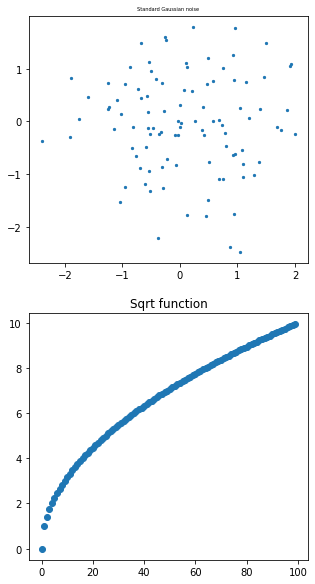

In [142]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
ax[0].scatter(np.random.randn(100), np.random.randn(100), s=5)

x = list(range(0, 100))
y = [i ** (1/2) for i in x]
ax[1].scatter(x, y)


ax[0].set_title("Standard Gaussian noise", fontsize=5)
ax[1].set_title("Sqrt function")

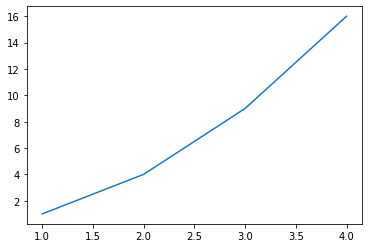

In [129]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

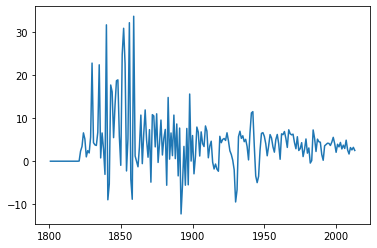

In [127]:
plt.plot(df_gdp["Australia"])

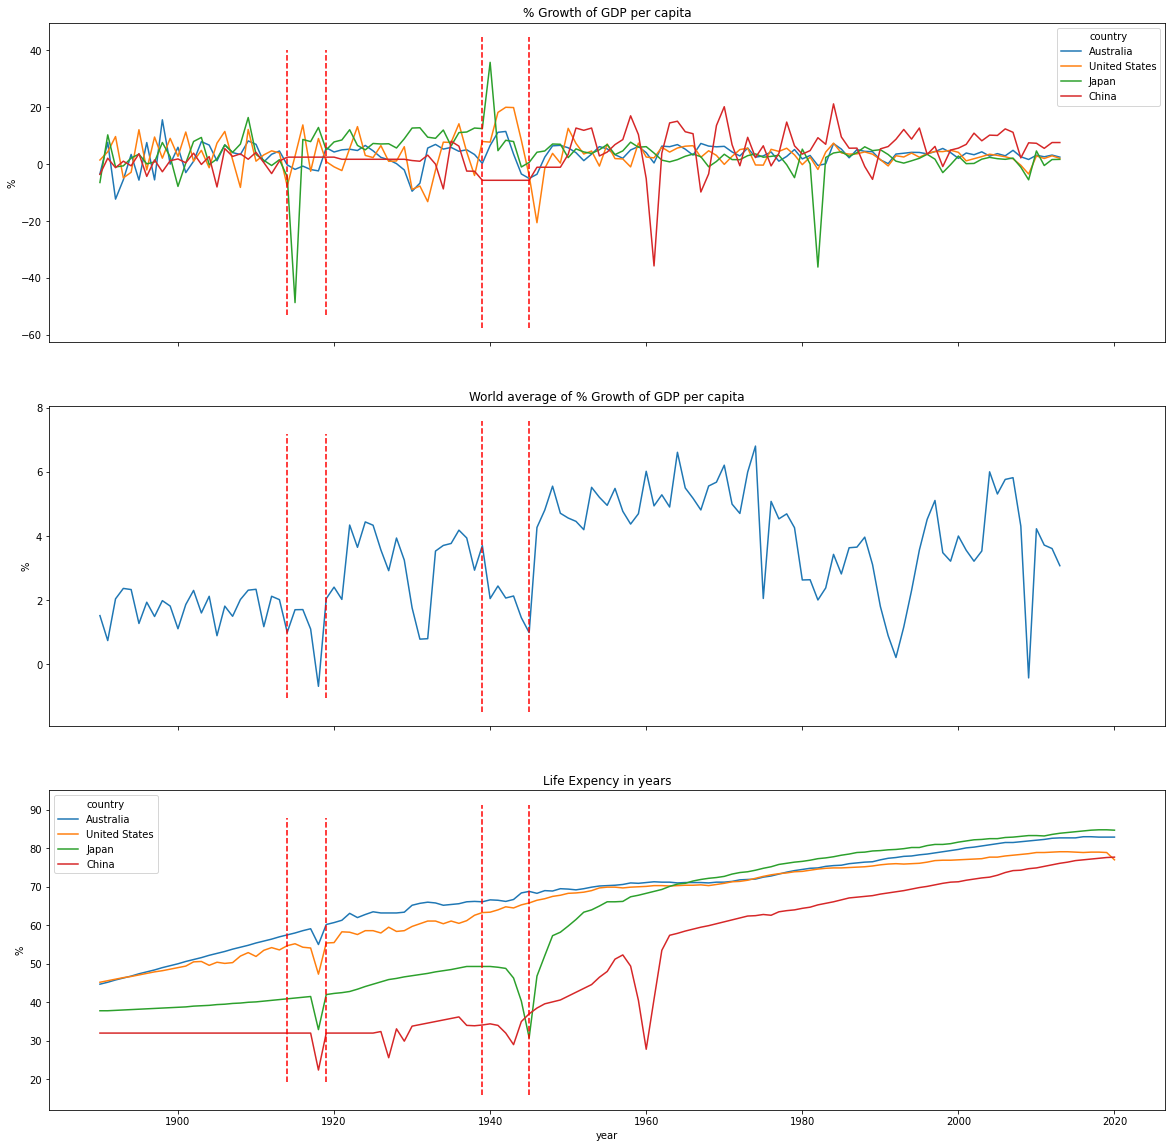

In [130]:
# Creating a matplotlib figure and a set of axes. 
fig, ax = plt.subplots(
    3, 1, # Number of rows and columns
    figsize=(20, 20),  
    sharex=True  # Force all axes to share their x-axis, which is "year" in this case.
)

# We won't work with all the countries at once, that would be very messy (Try it!). 
# Just a few that we are interested in.
countries = ["Australia","United States", "Japan", "China"]
start_year = 1890
end_year = 2020

# Plot time series. 
df_gdp.loc[start_year:end_year, countries].plot(ax=ax[0])
ax[0].set_title("% Growth of GDP per capita")

df_gdp.loc[start_year:end_year, ].mean(axis=1).plot(ax=ax[1])
ax[1].set_title("World average of % Growth of GDP per capita")

df_life.loc[start_year:end_year, countries].plot(ax=ax[2])
ax[2].set_title("Life Expency in years")


# Mark the start and end of the two world wars on the plots. 
world_war = {
    "first": (1914, 1919), 
    "second": (1939, 1945)
}
for i in [0, 1, 2]:
    ax[i].set_ylabel("%")
    ax[i].set_xlabel("year")
    for start, end in world_war.values():
        ymin, ymax = ax[i].get_ylim()
        ax[i].vlines(x=np.array([start, end]), ymin=ymin, ymax=ymax, colors='r', linestyles="dashed")
    



---
# Correlation analysis
---
I was curious about whether countries with similar geopolitical factors have similar GDP growth profile. Here's an attempt at visualising it. The idea is to compute the correlation coefficient 
$$
\rho = \frac{E[(GDP_1 - \mu_1)(GDP_2 - \mu_2)]}{\sigma_1 \sigma_2}
$$
of the GDP growth between all pairs of countries, treating each time point as an independent sample. We then treat the absolute value, $\|\rho_{country_1, country_2}\|$ as the "distance" between the pair of countries. By setting a cut off (say, absolute correlatin of 0.5) to mean "correlated GDP growth", we can construct a graph to visualise countries that are economically clustered. 


Note:  
We are performing correlation analysis on the **growth** of GDP at a given year, instead of the absolute value. This mitigate a common time series analysis problem of spurious correlation caused by an overall trend. 

Warning:  
This is by no way a rigorous statistical procedure. We are exploring our data and generating hypothesis that we can submitted to proper statistical analysis. 

In [100]:
corr = np.abs(df_gdp.dropna().corr()) - np.diag(np.ones(df_gdp.dropna().shape[1]))
cut_off = 0.55
df_corr = corr.loc[corr.max(axis=1) > cut_off, corr.max(axis=0) > cut_off]
df_corr.style.background_gradient(cmap='coolwarm')


We can now check whether geopolitically similar countries are linked to each other. 

Cliques of the graph: 
 - US, UK, Canada
 - North and South Korea
 - UAE cluster
 - European cluster, etc 
 - ...

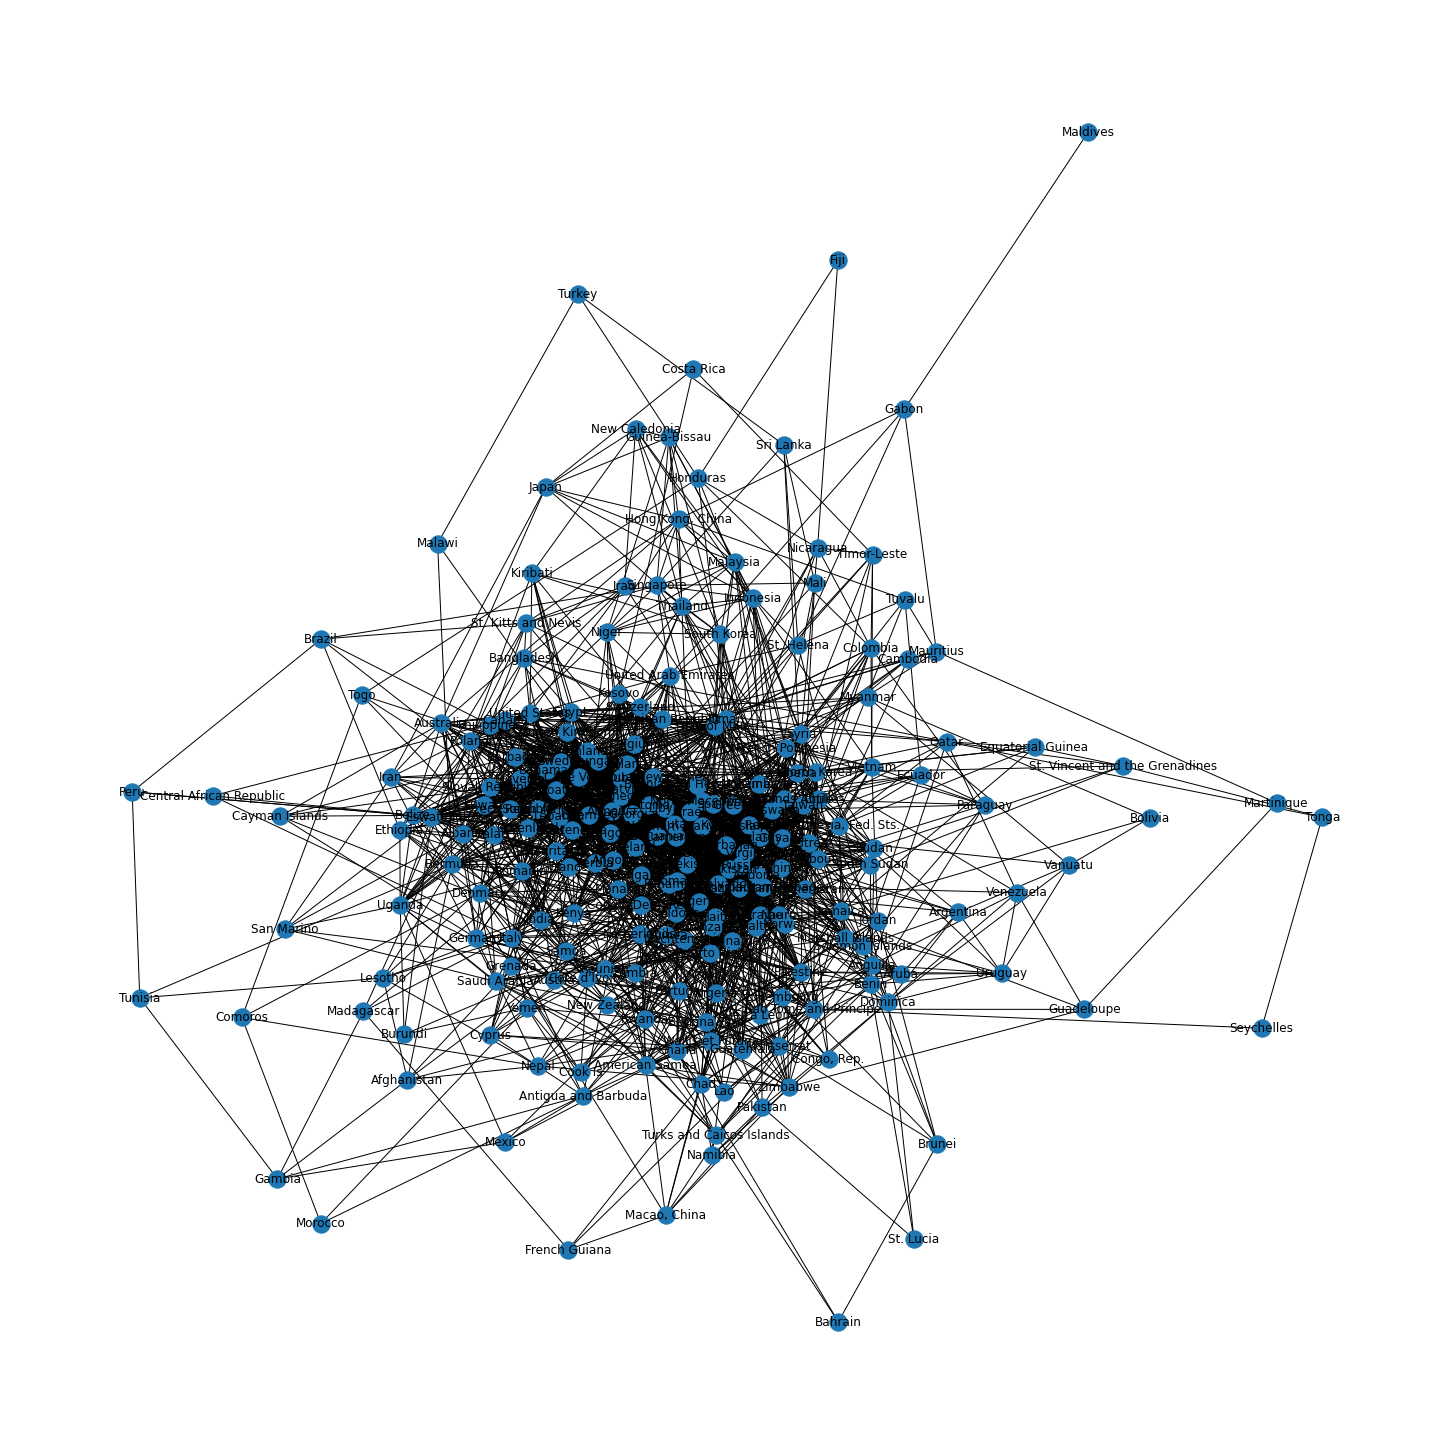

In [101]:
plt.figure(figsize=(20, 20))
G = nx.Graph(df_corr > cut_off)
nx.draw(G, with_labels=True)